# 1 Introduction

This notebook visualizes the G-SMOTE data generation mechanism. The results are compared to SMOTE and ADASYN oversamplers. The code is adapted from the [imbalanced-learn documentation page](http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py).

# 2 Imports

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import SVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE
from overlearn.classification.geometric_smote import GeometricSMOTE

from sklearn.model_selection import cross_val_score
from metriclearn.classification import SCORERS

# 3 Define functions

In [2]:
def create_dataset(n_samples, weights, class_sep, n_clusters):
    return make_classification(n_samples=n_samples, 
                               n_features=2,
                               n_informative=2, 
                               n_redundant=0, 
                               n_repeated=0,
                               n_classes=2,
                               n_clusters_per_class=n_clusters,
                               weights=weights,
                               class_sep=class_sep, 
                               random_state=1)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_sample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

# 4 Plot oversamplers

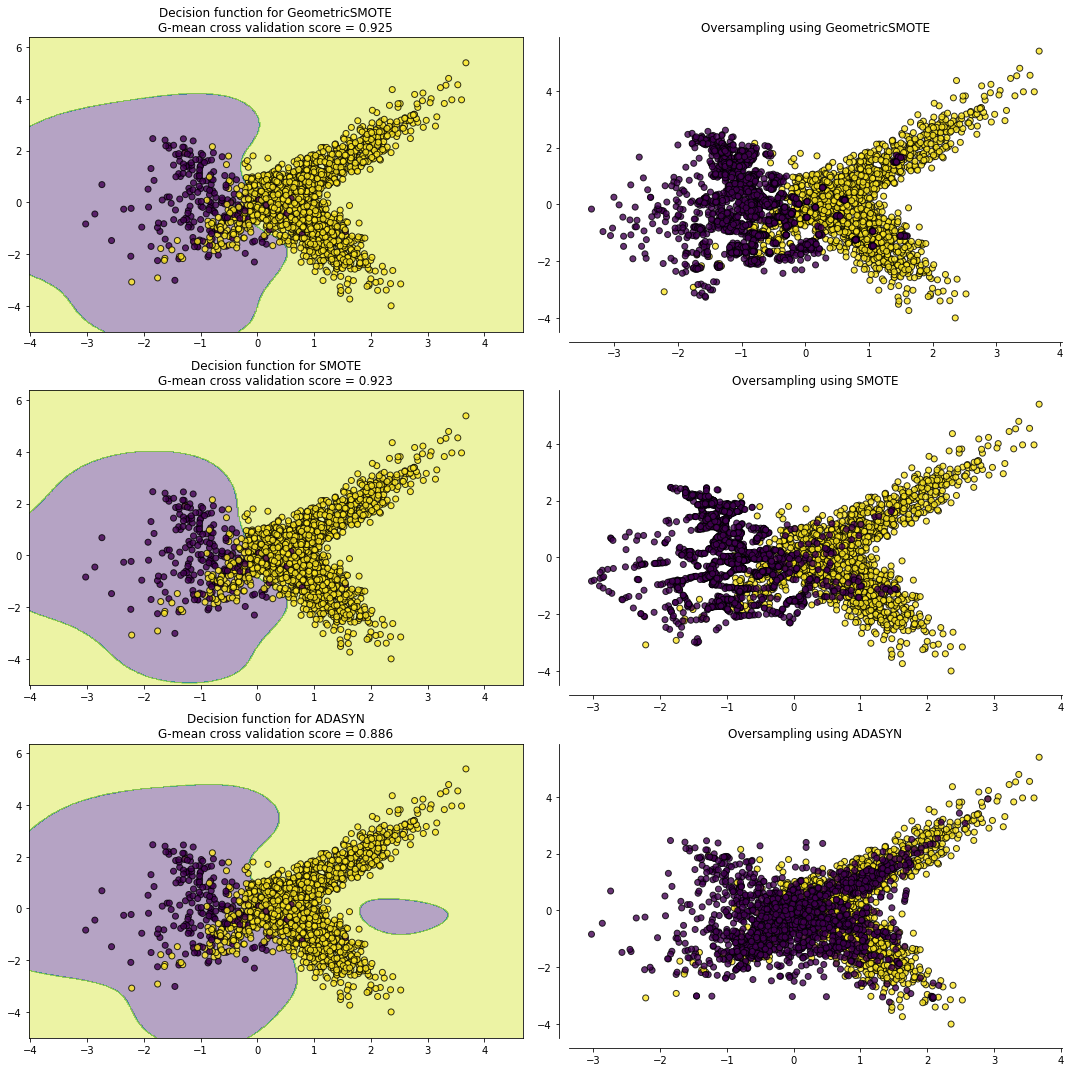

In [3]:
fig, ax_arr = plt.subplots(3, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=2000, weights=(0.1, 0.9), class_sep=0.9, n_clusters=2)

oversamplers = (GeometricSMOTE(random_state=0), 
               SMOTE(random_state=0),
               ADASYN(random_state=0)
               )
for ax, oversampler in zip(ax_arr, oversamplers):
    clf = make_pipeline(oversampler, SVC())
    cv_score = cross_val_score(clf, X, y, scoring='geometric_mean_score', cv=5).mean()
    clf.fit(X, y)
    oversampler_name = oversampler.__class__.__name__
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}\nG-mean cross validation score = {:.3f}'.format(oversampler_name, cv_score))
    plot_resampling(X, y, oversampler, ax[1])
    ax[1].set_title('Oversampling using {}'.format(oversampler_name))
fig.tight_layout()
plt.show()